# Template Model Classification - Dataset X_train

In [1]:
#import semua library yg bakalan dipake di sini, biar rapih
#kalo kurang tambahin aja yaa wkwkwk

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score, auc, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from xgboost import XGBClassifier

# IMPORT & SPLIT DATASET 

In [2]:
df_train_x_train = pd.read_csv('train_fs.csv')
df_test_x_train = pd.read_csv('test_fs.csv')

In [3]:
df_train_x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weight_in_gms          8799 non-null   float64
 1   shipping_cost          8799 non-null   float64
 2   profit                 8799 non-null   float64
 3   profit_minus_discount  8799 non-null   float64
 4   Discount_offered       8799 non-null   float64
 5   is_important           8799 non-null   int64  
 6   cust_frequency         8799 non-null   int64  
 7   arrived_late           8799 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 550.1 KB


In [4]:
df_test_x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weight_in_gms          2200 non-null   float64
 1   shipping_cost          2200 non-null   float64
 2   profit                 2200 non-null   float64
 3   profit_minus_discount  2200 non-null   float64
 4   Discount_offered       2200 non-null   float64
 5   is_important           2200 non-null   int64  
 6   cust_frequency         2200 non-null   int64  
 7   arrived_late           2200 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 137.6 KB


In [5]:
#split X dan Y 
#moga2 split train sama testnya bener ya KWKWKWKWK

X_train = df_train_x_train.drop('arrived_late', axis = 1)
y_train = df_train_x_train['arrived_late']
X_test = df_test_x_train.drop('arrived_late', axis = 1)
y_test = df_test_x_train['arrived_late']

# FUNCTIONS

In [6]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))
    print('\n------------------------\n')
    print(classification_report(y_test, y_pred))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    
#feature importance untuk SVM
def feature_plot(classifier, feature_names, top_features=8):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(18, 7))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 0 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
    plt.show()

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [7]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(C, train_scores, label='Train')
    plt.plot(C, test_scores, label='Test')
    plt.legend()
    plt.show()

# AdaBoost

In [8]:
ada = AdaBoostClassifier()

In [9]:
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
eval_classification(ada)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.82
Recall (Test Set): 0.59
F1-Score (Test Set): 0.69
AUC (test-proba): 0.76
AUC (train-proba): 0.76

------------------------

              precision    recall  f1-score   support

           0       0.57      0.81      0.67       887
           1       0.82      0.59      0.69      1313

    accuracy                           0.68      2200
   macro avg       0.70      0.70      0.68      2200
weighted avg       0.72      0.68      0.68      2200



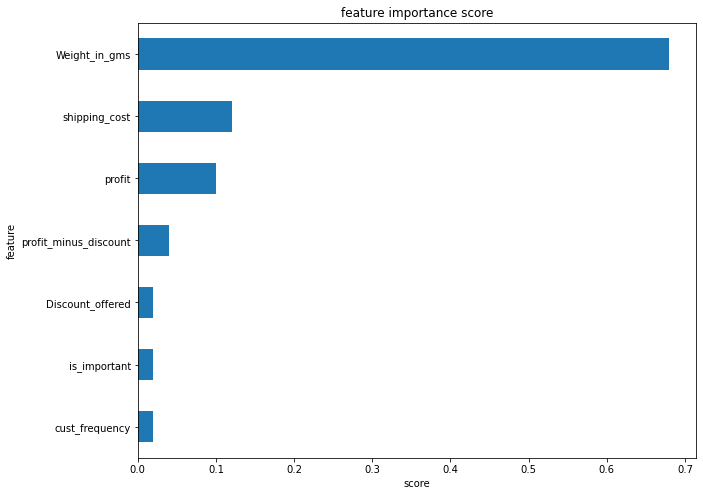

In [10]:
show_feature_importance(ada)

## Hasil adaboost lumayan, coba kita cek gridsearch

In [11]:
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

'''def precision_0(y, y_pred, **kwargs):
    return precision_score(y, y_pred, pos_label = 0)'''

prec_0 = make_scorer(precision_score, pos_label = 0)

grid = dict()
grid['n_estimators'] = [10,50,100,500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1]
grid['algorithm'] = ['SAMME', 'SAMME.R']

grid

{'n_estimators': [10, 50, 100, 500],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
 'algorithm': ['SAMME', 'SAMME.R']}

In [15]:
scoring = {"AUC": "roc_auc", "Recall": 'recall', "Accuracy": prec_0}

In [16]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid= grid, n_jobs=-1, cv=10, scoring=scoring,refit = 'AUC')
grid_result = grid_search.fit(X_train,y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.746016 using {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 500}


Lawas

In [12]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid= grid, n_jobs=-1, cv=10, scoring=prec_0)
grid_result = grid_search.fit(X_train,y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.572479 using {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 50}


In [13]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid= grid, n_jobs=-1, cv=10, scoring='recall')
grid_result = grid_search.fit(X_train,y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.622667 using {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 100}


In [14]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid= grid, n_jobs=-1, cv=10, scoring='roc_auc')
grid_result = grid_search.fit(X_train,y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.746016 using {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 500}
